https://data.gov.ie/dataset/province-boundary/resource/ebe32ca4-b837-4ae4-8338-4d9d9c927c9d

In [19]:
import geopandas as gpd
gdf = gpd.read_file(r'/Users/dhruvpandit/Downloads/Province.shapezip/Province.shp')
bounds = gdf.total_bounds  # Returns a tuple (minx, miny, maxx, maxy)

# Print the boundaries
print(f"Westernmost Longitude: {bounds[0]}")
print(f"Southernmost Latitude: {bounds[1]}")
print(f"Easternmost Longitude: {bounds[2]}")
print(f"Northernmost Latitude: {bounds[3]}")

Westernmost Longitude: -10.662453841999934
Southernmost Latitude: 51.41943058500004
Easternmost Longitude: -5.9952891579999354
Northernmost Latitude: 55.446605326000046


In [20]:
gdf

,gml_id,OBJECTID,beginLifes,endLifespa,localId,datasetNam,inspireId,inspireThe,version,descriptio,...,scale,coordinate,styleLayer,licence,qualitySta,dataProven,dataAccess,area,measureUni,geometry
0,F74__1,1,2012-03-27T00:00:00,2015-06-15T14:00:00,3,Province Boundaries,AU.AdministrativeUnit.IE.OSI.ProvinceBoundary....,http://inspire.ec.europa.eu/theme/au,2011,http://dbpedia.org/resource/Provinces_of_Ireland,...,Local Authority dataset generalised to 20m,http://www.opengis.net/def/crs/EPSG/0/4326,"Green fill (RGB: 137,205,102) with grey outlin...",https://creativecommons.org/licenses/by/4.0/,Boundary dataset generalised to 20m generated ...,http://dbpedia.org/resource/Central_Statistics...,https://data.gov.ie/dataset/census-2011-bounda...,17711.3268365445,http://vocab.nerc.ac.uk/collection/P06/current...,"MULTIPOLYGON (((-10.28835 53.61827, -10.28808 ..."
1,F74__2,2,2012-03-27T00:00:00,2015-06-15T14:00:00,2,Province Boundaries,AU.AdministrativeUnit.IE.OSI.ProvinceBoundary....,http://inspire.ec.europa.eu/theme/au,2011,http://dbpedia.org/resource/Provinces_of_Ireland,...,Local Authority dataset generalised to 20m,http://www.opengis.net/def/crs/EPSG/0/4326,"Green fill (RGB: 137,205,102) with grey outlin...",https://creativecommons.org/licenses/by/4.0/,Boundary dataset generalised to 20m generated ...,http://dbpedia.org/resource/Central_Statistics...,https://data.gov.ie/dataset/census-2011-bounda...,24676.6891841066,http://vocab.nerc.ac.uk/collection/P06/current...,"MULTIPOLYGON (((-10.65303 52.07815, -10.65293 ..."
2,F74__3,3,2012-03-27T00:00:00,2015-06-15T14:00:00,1,Province Boundaries,AU.AdministrativeUnit.IE.OSI.ProvinceBoundary....,http://inspire.ec.europa.eu/theme/au,2011,http://dbpedia.org/resource/Provinces_of_Ireland,...,Local Authority dataset generalised to 20m,http://www.opengis.net/def/crs/EPSG/0/4326,"Green fill (RGB: 137,205,102) with grey outlin...",https://creativecommons.org/licenses/by/4.0/,Boundary dataset generalised to 20m generated ...,http://dbpedia.org/resource/Central_Statistics...,https://data.gov.ie/dataset/census-2011-bounda...,19804.7161689368,http://vocab.nerc.ac.uk/collection/P06/current...,"MULTIPOLYGON (((-6.83021 52.19155, -6.83147 52..."
3,F74__4,4,2012-03-27T00:00:00,2015-06-15T14:00:00,4,Province Boundaries,AU.AdministrativeUnit.IE.OSI.ProvinceBoundary....,http://inspire.ec.europa.eu/theme/au,2011,http://dbpedia.org/resource/Provinces_of_Ireland,...,Local Authority dataset generalised to 20m,http://www.opengis.net/def/crs/EPSG/0/4326,"Green fill (RGB: 137,205,102) with grey outlin...",https://creativecommons.org/licenses/by/4.0/,Boundary dataset generalised to 20m generated ...,http://dbpedia.org/resource/Central_Statistics...,https://data.gov.ie/dataset/census-2011-bounda...,8088.02005142548,http://vocab.nerc.ac.uk/collection/P06/current...,"MULTIPOLYGON (((-8.83267 54.66407, -8.83294 54..."


In [1]:
import xarray as xr
from dask.diagnostics import ProgressBar
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Polygon, MultiPolygon, Point
import geopandas as gpd
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import dask.array as da
import dask
from tqdm import tqdm  # Optional: For progress tracking
from scipy.interpolate import griddata
from statsmodels.tsa.seasonal import seasonal_decompose


In [10]:
reanalysis_nc = xr.open_dataset(r'/Users/dhruvpandit/Downloads/adaptor.mars.internal-1718723277.7244294-474-2-9b2191bb-64d7-4952-84bf-a02b08486cee.nc')
#mun_gdf = gpd.read_file(r'../../municipality_data/municipalities-shapefile-2/concelhos.shp')
reanalysis_nc = reanalysis_nc.resample(time='D').mean('time')
reanalysis_df = reanalysis_nc.to_dataframe()

In [5]:
reanalysis_df = reanalysis_df.reset_index()
reanalysis_df.head()

,longitude,latitude,time,t2m,stl2,sp,tp
0,-11.0,56.0,2001-01-01 00:00:00,282.531189,282.992920,96758.351562,0.000122
1,-11.0,56.0,2001-01-01 01:00:00,282.343628,282.993195,96692.875000,0.000106
2,-11.0,56.0,2001-01-01 02:00:00,282.210144,282.993805,96722.921875,0.000048
3,-11.0,56.0,2001-01-01 03:00:00,282.285461,282.992310,96786.031250,0.000003
4,-11.0,56.0,2001-01-01 04:00:00,282.662079,282.992615,96833.640625,0.000025


In [4]:
class PolygonConversion:

    @staticmethod
    def fetch_geo_polygon(latitude: float, longitude: float, lat_grid_resolution: float, lon_grid_resolution: float) -> Polygon:
        """Create a Polygon based on latitude, longitude, and resolution.

        Example ::
            * - . - *
            |       |
            .   •   .
            |       |
            * - . - *
        In order to create the polygon, we require the `*` point as indicated in the above example.
        To determine the position of the `*` point, we find the `.` point.
        The `get_lat_lon_range` function gives the `.` point and `bound_point` gives the `*` point.
            """        # Calculate the half-size of the bounding box
        half_size_lon = lon_grid_resolution / 2
        half_size_lat = lat_grid_resolution / 2
        
        # Calculate the bound points
        lower_left = (longitude - half_size_lon, latitude - half_size_lat)
        upper_left = (longitude - half_size_lon, latitude + half_size_lat)
        upper_right = (longitude + half_size_lon, latitude + half_size_lat)
        lower_right = (longitude + half_size_lon, latitude - half_size_lat)
        
        polygon = Polygon([lower_left, upper_left, upper_right, lower_right])
        return polygon



In [11]:
polygon_converter = PolygonConversion()

# Assume your dataset is named 'ds' (replace it with the actual name)
# Accessing latitude and longitude from the dataset
lats = reanalysis_df.index.get_level_values('latitude').values
lons = reanalysis_df.index.get_level_values('longitude').values

# Spatial resolution of your data
lat_resolution = 0.25
lon_resolution = 0.25

# Create a DataFrame to store latitudes and longitudes
df_points = pd.DataFrame({
    'lat': lats,
    'lon': lons
})

geometry = [Point(lon, lat) for lon, lat in zip(lons, lats)]
gdf_points = gpd.GeoDataFrame(geometry = geometry, crs="EPSG:4326", index=reanalysis_df.index)
gdf_points.rename(columns = {'geometry' : 'points_geometry'}, inplace = True)
# Create a GeoDataFrame with Polygon geometries
polygons = []
for _, row in tqdm(df_points.iterrows(), total=len(df_points), desc="Creating Polygons"):
    lat, lon = row['lat'], row['lon']
    polygon = polygon_converter.fetch_geo_polygon(lat, lon, lat_resolution, lon_resolution)
    polygons.append(polygon)

# Create a GeoDataFrame with the constructed polygons
gdf_polygons = gpd.GeoDataFrame(geometry=polygons, crs="EPSG:4326")
gdf_polygons = gdf_polygons.set_index(reanalysis_df.index)

Creating Polygons: 100%|██████████| 191625/191625 [00:04<00:00, 47278.68it/s]


In [12]:

# Extract latitude and longitude from the MultiIndex DataFrame
latitudes = reanalysis_df.index.get_level_values('latitude').values
longitudes = reanalysis_df.index.get_level_values('longitude').values


# Merge the GeoDataFrame into the MultiIndex DataFrame
merged_df = pd.concat([reanalysis_df, gdf_points, gdf_polygons], axis=1)


In [17]:
merged_df = merged_df.reset_index()
merged_df = gpd.GeoDataFrame(merged_df)

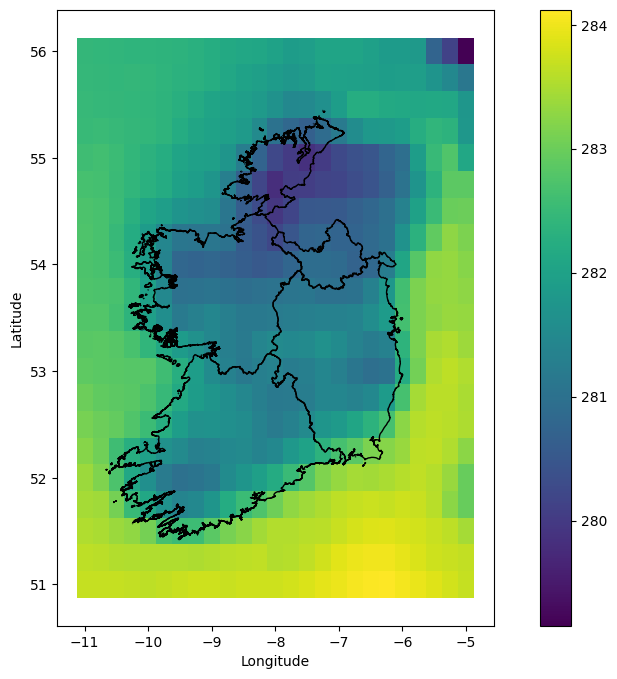

In [22]:
filtered_df = merged_df[merged_df['time'] == '2001-01-01']
#filtered_df = filtered_df.dropna(subset = ['tp'])
# Compute the mean over the step dimension as well
longitudes = filtered_df.longitude.values
latitudes = filtered_df.latitude.values
values = filtered_df['tp'].values
filtered_df = gpd.GeoDataFrame(filtered_df, crs='EPSG:4326')


fig, ax = plt.subplots(figsize=(12, 8))
filtered_df.plot(column='t2m', kind = 'geo',cmap='viridis', legend=True, ax=ax)
gdf.plot(ax=ax, facecolor="none", edgecolor='black')  # Adjust colors as needed

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
#plt.savefig(r'/Users/dhruvpandit/Mirror/University/Masters/Thesis/images/2017Q3_grid_plot.png' , dpi = 300)

# Show the plot
plt.show()